# Machine Learning Model
Only 10 data points
Aim is to analyse if a subject will pass or fail a test based on hours studied

Predictions: [1 0]
Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\davie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


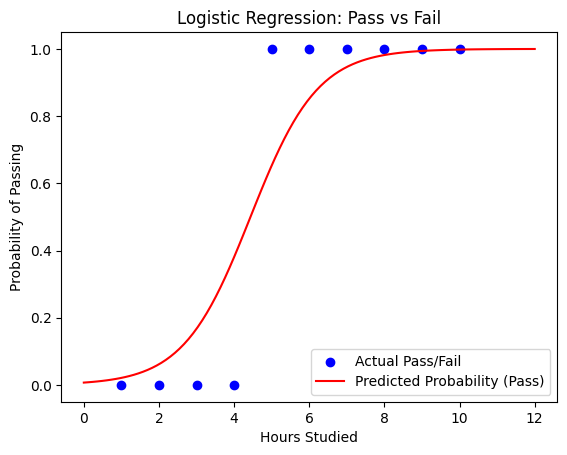

In [9]:
# Step 1: Import Libraries 

# Install scikit-learn 
# pip install scikit-learn

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 

# Step 2: Prepare Data 
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score': [12, 25, 32, 40, 50, 55, 65, 72, 88, 90]
}

df = pd.DataFrame(data)

# Step 3: Create Binary (Pass or Fail)
df['Pass'] = (df['Score'] >= 50).astype(int)

x = df[['Hours_Studied']]  # Feature
y = df['Pass']             # Target (0 or 1)

# Step 4: Split Data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression Model 
model = LogisticRegression()
model.fit(x_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(x_test)
print("Predictions:", y_pred)

# Step 7: Evaluate Model 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualise Decision Boundary
x_sorted = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_sorted)[:, 1]

plt.scatter(x, y, color='blue', label='Actual Pass/Fail')
plt.plot(x_sorted, y_prob, color='red', label='Predicted Probability (Pass)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Pass vs Fail')
plt.legend()
plt.show()